In [8]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import seaborn as sns
print(tf.__version__)
batch_size = 32
img_height = 180
img_width = 180
data_root="\\Users\\George\\Documents\\Python\\ADS CapStone\\aff_wild_annotations_bboxes_landmarks_new\\faces\\"
data_root_test= "\\Users\\George\\Documents\\Python\\ADS CapStone\\aff_wild_annotations_bboxes_landmarks_new\\faceslast20\\"

2.4.1


In [9]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root+'arousal',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root+'arousal',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_test+'arousal',
    seed=123,
    image_size=(img_height, img_width),
    batch_size = 200
)

Found 860722 files belonging to 3 classes.
Using 688578 files for training.
Found 860722 files belonging to 3 classes.
Using 172144 files for validation.
Found 25362 files belonging to 3 classes.


['high', 'low', 'neutral']


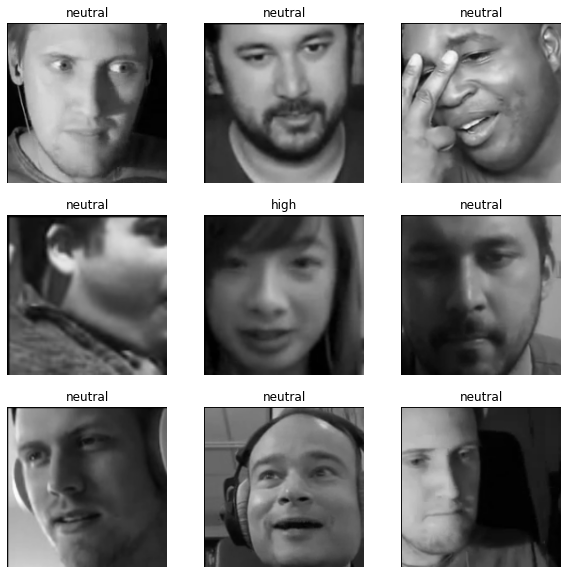

In [10]:

class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [13]:

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor= 'loss' , patience=1)

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks = [callback]
)

Epoch 1/20
21519/21519 [==============================] - 31594s 1s/step - loss: 0.3574 - accuracy: 0.8596 - val_loss: 0.2013 - val_accuracy: 0.9210
Epoch 2/20
21519/21519 [==============================] - 25385s 1s/step - loss: 0.1672 - accuracy: 0.9341 - val_loss: 0.1627 - val_accuracy: 0.9421
Epoch 3/20
21519/21519 [==============================] - 16044s 745ms/step - loss: 0.1077 - accuracy: 0.9595 - val_loss: 0.1615 - val_accuracy: 0.9458
Epoch 4/20
21519/21519 [==============================] - 19512s 907ms/step - loss: 0.0772 - accuracy: 0.9716 - val_loss: 0.1792 - val_accuracy: 0.9484
Epoch 5/20
21519/21519 [==============================] - 19916s 925ms/step - loss: 0.0609 - accuracy: 0.9783 - val_loss: 0.1666 - val_accuracy: 0.9522
Epoch 6/20
21519/21519 [==============================] - 23517s 1s/step - loss: 0.0501 - accuracy: 0.9826 - val_loss: 0.1821 - val_accuracy: 0.9542
Epoch 7/20
21519/21519 [==============================] - 20726s 963ms/step - loss: 0.0426 - accu

In [15]:

#result = model.evaluate(test_ds)
#dict(zip(model.metrics_names, result))

test_images = []
test_labels = []
predictions = []

for image, label in test_ds.take(1):
  test_images.append(image.numpy())
  test_labels.append(label.numpy())
  predictions.append(np.argmax(model.predict(test_images), axis=1))

test_labels = np.array(test_labels)
predictions = np.array(predictions)

y_true = test_labels

test_acc = sum(predictions[0] == y_true[0]) / len(y_true[0])
print(f'Test set accuracy: {test_acc:.0%}')

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Test set accuracy: 68%


['high', 'low', 'neutral']


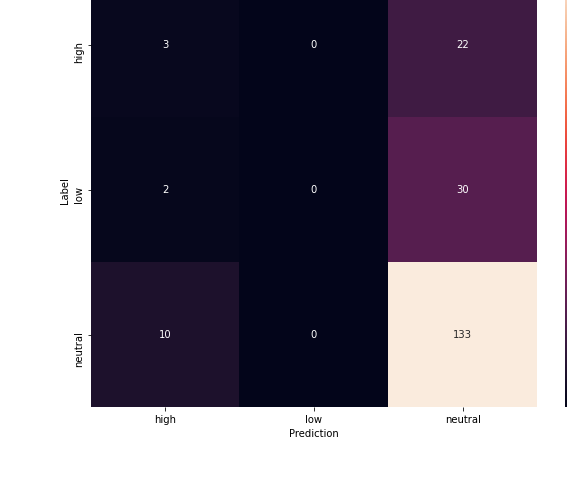

In [16]:

print(class_names)
confusion_mtx = tf.math.confusion_matrix(y_true[0], predictions[0]) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, yticklabels = class_names, xticklabels = class_names,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [17]:

filepath = '\\Users\\George\\Documents\\Python\\ADS CapStone\\Model(omit20)'
model.save(filepath)


INFO:tensorflow:Assets written to: \Users\George\Documents\Python\ADS CapStone\Model(omit20)\assets
INFO:tensorflow:Assets written to: \Users\George\Documents\Python\ADS CapStone\Model(omit20)\assets
